## Support Vector Machine Intro

In [1]:
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime
import pickle

In [2]:
df = pd.read_csv('breast+cancer+wisconsin+original/breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)
df.drop('id', axis=1,inplace=True)

x = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [3]:
model = SVC()
model.fit(x_train,y_train)

example_measure = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,3,2,2,3,2,1]])
example_measure = example_measure.reshape(len(example_measure),-1)

print(model.predict(example_measure))

accuracy = model.score(x_test,y_test)
print(accuracy)

[2 2]
0.6785714285714286


## Support Vector Machine 

Optimized a step!
Optimized a step!
Optimized a step!
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
1.0
-1.0


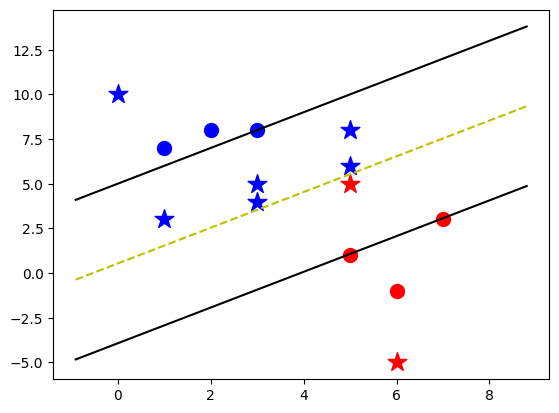

In [4]:
import matplotlib.pyplot as plt
import numpy as np

class support_vector_machine:
    def __init__(self, visulaization=True):
        self.visualization = visulaization
        self.color = {1:"r", -1:"b"}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
            
    # train
    def fit(self, data): 
        self.data = data
        # {||w||: [W,b]}
        opt_dict = {}
        
        transforms = [[1,1],[-1,1],[1,-1],[-1,-1]]
        
        all_data= []
        for i in self.data:
            for features in self.data[i]:
                for feature in features:
                    all_data.append(feature)
                    
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        step_sizes = [self.max_feature_value * 0.1, self.max_feature_value * 0.01, self.max_feature_value * 0.001]
        
        b_range_multiple = 5
        b_multiple = 5
        
        latest_optimum = self.max_feature_value * 10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            optimized = False
            
            while not optimized:
                for b in np.arange(-1*self.max_feature_value*b_range_multiple, self.max_feature_value*b_range_multiple,step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # yi (xi.w+b) >= 1
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step!')
                else:
                    w = w - step
            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]
            
            self.w = opt_choice[0]
            self.b = opt_choice[1]                    
            latest_optimum = opt_choice[0][0] + step*2        
        
    def predict(self, features):
        classification = np.sign(np.dot(np.array(features),self.w) + self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1],s=200, marker='*',c=self.color[classification])
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.color[i]) for x in data_dict[i]] for i in data_dict]
        
        # hyperplane = x.w + b
        # v = x.w + b
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]
        
        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # (w.x+b) = 1
        # positive support vector hyperlane
        psv1 = hyperplane(hyp_x_min,self.w,self.b,1)
        psv2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2],'k')
        
        # (w.x+b) = -1
        # negative support vector hyperlane
        nsv1 = hyperplane(hyp_x_min,self.w,self.b,-1)
        nsv2 = hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2],'k')
        
        # (w.x+b) = 0
        # support vector hyperlane
        db1 = hyperplane(hyp_x_min,self.w,self.b,0)
        db2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2],'y--') 
        
        plt.show()       


data_dict = {-1:np.array([[1,7],[2,8],[3,8]]), 1:np.array([[5,1],[6,-1],[7,3]])}

svm = support_vector_machine()
svm.fit(data=data_dict)

predict_us = [[0,10],[1,3],[3,4],[3,5],[5,5],[5,6],[6,-5],[5,8]]

for i in predict_us:
    print(svm.predict(i))


svm.visualize()


     pcost       dcost       gap    pres   dres
 0: -5.7678e+01 -1.6890e+02  5e+02  2e+01  2e+00
 1: -8.6894e+01 -2.0205e+02  2e+02  7e+00  8e-01
 2: -1.1459e+02 -2.1370e+02  1e+02  3e+00  4e-01
 3: -1.9089e+02 -2.7016e+02  1e+02  2e+00  2e-01
 4: -2.3645e+02 -2.8375e+02  6e+01  5e-01  6e-02
 5: -2.6007e+02 -2.6656e+02  8e+00  6e-02  8e-03
 6: -2.6329e+02 -2.6416e+02  1e+00  8e-03  1e-03
 7: -2.6379e+02 -2.6380e+02  2e-02  8e-05  1e-05
 8: -2.6380e+02 -2.6380e+02  2e-04  8e-07  1e-07
 9: -2.6380e+02 -2.6380e+02  2e-06  8e-09  1e-09
Optimal solution found.
7 support vectors out of 180 points
20 out of 20 predictions correct


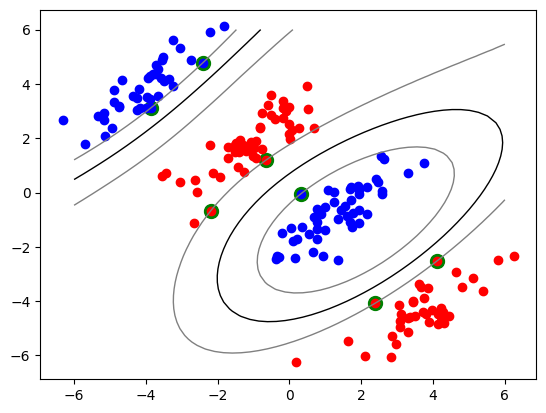

In [5]:
# Mathieu Blondel, September 2010
# License: BSD 3 clause

import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

class SVM(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

if __name__ == "__main__":
    import pylab as pl

    def gen_lin_separable_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[0.8, 0.6], [0.6, 0.8]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_non_lin_separable_data():
        mean1 = [-1, 2]
        mean2 = [1, -1]
        mean3 = [4, -4]
        mean4 = [-4, 4]
        cov = [[1.0,0.8], [0.8, 1.0]]
        X1 = np.random.multivariate_normal(mean1, cov, 50)
        X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 50)
        X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_lin_separable_overlap_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[1.5, 1.0], [1.0, 1.5]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def split_train(X1, y1, X2, y2):
        X1_train = X1[:90]
        y1_train = y1[:90]
        X2_train = X2[:90]
        y2_train = y2[:90]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train

    def split_test(X1, y1, X2, y2):
        X1_test = X1[90:]
        y1_test = y1[90:]
        X2_test = X2[90:]
        y2_test = y2[90:]
        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))
        return X_test, y_test

    def plot_margin(X1_train, X2_train, clf):
        def f(x, w, b, c=0):
            # given x, return y such that [x,y] in on the line
            # w.x + b = c
            return (-w[0] * x - b + c) / w[1]

        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        # w.x + b = 0
        a0 = -4; a1 = f(a0, clf.w, clf.b)
        b0 = 4; b1 = f(b0, clf.w, clf.b)
        pl.plot([a0,b0], [a1,b1], "k")

        # w.x + b = 1
        a0 = -4; a1 = f(a0, clf.w, clf.b, 1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, 1)
        pl.plot([a0,b0], [a1,b1], "k--")

        # w.x + b = -1
        a0 = -4; a1 = f(a0, clf.w, clf.b, -1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, -1)
        pl.plot([a0,b0], [a1,b1], "k--")

        pl.axis("tight")
        pl.show()

    def plot_contour(X1_train, X2_train, clf):
        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        X1, X2 = np.meshgrid(np.linspace(-6,6,50), np.linspace(-6,6,50))
        X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
        Z = clf.project(X).reshape(X1.shape)
        pl.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

        pl.axis("tight")
        pl.show()

    def test_linear():
        X1, y1, X2, y2 = gen_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM()
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_margin(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_non_linear():
        X1, y1, X2, y2 = gen_non_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(gaussian_kernel)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_soft():
        X1, y1, X2, y2 = gen_lin_separable_overlap_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(C=0.2)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

    test_non_linear()